In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("database.sqlite")

C:\Users\marty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.drop(columns=["Unnamed: 0","HOSPSTAY",'DOF1', 'GAD1','DVEST', 
                 'DVBASIS','BAGDEPLY','BAGFAIL','CASENO','MANAVAIL', 'MANFAIL', 'TREATMNT','DEATH'
                ],inplace = True)




Aby sprawnie pracować na danych zawartych w tabeli, podzielimy ją na 3 tabele połacząne kluczem głównym (CASEID i PSU)



In [4]:
occupants = df[["CASEID", 'PSU','AGE', 'BAGAVAIL','CHTYPE', 'HEIGHT', 'INJSEV',
       'MANUSE', 'OCCNO', 'ROLE', 'SEATPOS', 'SEX', 'WEIGHT']]

In [5]:
occupants.drop_duplicates(subset=["CASEID", 'PSU','AGE', 'BAGAVAIL','CHTYPE', 'HEIGHT', 'INJSEV',
       'MANUSE', 'OCCNO', 'ROLE', 'SEATPOS', 'SEX', 'WEIGHT'],inplace=True, ignore_index=True)

<ipython-input-5-6732b027358d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupants.drop_duplicates(subset=["CASEID", 'PSU','AGE', 'BAGAVAIL','CHTYPE', 'HEIGHT', 'INJSEV',


In [6]:
vehicles= df[['CASEID', 'PSU','BODYTYPE', 'MAKE' , 'DVTOTAL','MODELYR']]

In [7]:
vehicles.drop_duplicates(subset=['CASEID', 'PSU','BODYTYPE', 'MAKE' , 'DVTOTAL','MODELYR'],inplace=True, ignore_index=True)

<ipython-input-7-650ac2603853>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles.drop_duplicates(subset=['CASEID', 'PSU','BODYTYPE', 'MAKE' , 'DVTOTAL','MODELYR'],inplace=True, ignore_index=True)


In [8]:
accidents = df[['CASEID', 'PSU', 'STRATIF','YEAR']]

In [9]:
accidents.drop_duplicates(subset=['CASEID', 'PSU', 'STRATIF','YEAR'], inplace =True, ignore_index=True)

<ipython-input-9-0fba22f11641>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents.drop_duplicates(subset=['CASEID', 'PSU', 'STRATIF','YEAR'], inplace =True, ignore_index=True)


In [10]:
import math
x = float('nan')
math.isnan(x)

True

KOLUMNA HEIGHT

In [11]:
Height_new=[]
for i in occupants['HEIGHT']:
    if i>=0 and i<=80:
        Height_new.append(1)
    elif i>=81 and i<=120:
        Height_new.append(2)
    elif i>=121 and i<=150:
        Height_new.append(3)
    elif i>=151 and i<=175:
        Height_new.append(4)
    elif i>=176 and i<=190:
        Height_new.append(5)
    elif i>=191:
        Height_new.append(6)
    elif math.isnan(i):
        Height_new.append(None)

In [12]:
occupants['Height_new']=Height_new

<ipython-input-12-05ce475b907c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupants['Height_new']=Height_new


KOLUMNA CHTYPE

In [13]:
Chtype_new=[]

for i in occupants['CHTYPE']:
    if i==0:
        Chtype_new.append(0)
    elif i>=1 and i<=8:
        Chtype_new.append(1) 
    elif math.isnan(i):
        Chtype_new.append(None)

In [14]:
occupants['Chtype_new']=Chtype_new

<ipython-input-14-2c45352291ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupants['Chtype_new']=Chtype_new


KOLUMNA BAGAVAIL

In [15]:
Bagavail_new=[]

for i in occupants['BAGAVAIL']:
    if i==0 or i==2 or i==3:
        Bagavail_new.append(0) 
    elif i==1:
        Bagavail_new.append(1) 
    elif math.isnan(i):
        Bagavail_new.append(None)

In [16]:
occupants['Bagavail_new']=Bagavail_new

<ipython-input-16-0b308da1c91f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupants['Bagavail_new']=Bagavail_new


KOLUMNA AGE:

In [17]:
Age_new=[]

for i in occupants['AGE']:
    if i>=0 and i<=3:
        Age_new.append(1)
    elif i>=4 and i<=7:
        Age_new.append(2)
    elif i>=8 and i<=12:
        Age_new.append(3)
    elif i>=13 and i<=16:
        Age_new.append(4)
    elif i>=17 and i<=21:
        Age_new.append(5)
    elif i>=22 and i<=30:
        Age_new.append(6)
    elif i>=31 and i<=50:
        Age_new.append(7)
    elif i>=51 and i<=65:
        Age_new.append(8)
    elif i>=66:
        Age_new.append(9)
    elif math.isnan(i):
        Age_new.append(None)

In [18]:
occupants['Age_new']=Age_new

<ipython-input-18-60a1eb22d39d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupants['Age_new']=Age_new


### Wspolne funkcje - grupowanie

In [19]:
def classify_value(input_value,mappings): 
    
    for mark,values in  mappings.items():
        if input_value in values: 
            return mark 
         
    return None

### Kolumna bodytype

In [20]:
bodytype_mappings = {0:[1,2,3,4,5,6,7,8,9,17],                                       # osobowy
                          1:[61,62,63,64,69,74,78,79],                               # ciezarowka 
                          2:[24,25,28,50,58,59,60],                                  # busy   
                          3:[10,40,41,45,48],                                        # dostawcze 
                          4:[65,68,67,70,80,81,82,89,90],                            # motory&quady
                          5:[12, 14, 15, 16, 19, 20, 21, 22, 29, 30, 31, 32, 33,39], # większe samochody osobowe
                          6:[92, 93, 97, 42, 23, 11]}                                # pozostale 
    

vehicles["BODYTYPE_NEW"] = vehicles["BODYTYPE"].apply(classify_value,mappings=bodytype_mappings)


<ipython-input-20-d510a8e11388>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles["BODYTYPE_NEW"] = vehicles["BODYTYPE"].apply(classify_value,mappings=bodytype_mappings)


### Kolumna STRATIF 

In [21]:
stratif_mappings =       {0:['A','B'], # smiertelne obrażenia
                          1:['J','K'], # poważne obrażenia – hospitalizowany (min. 1noc)
                          2:['C','D'], #  poważne obrażenia – nie hospitalizowany
                          3:['E','F'], # niewielkie obrażenia, ale przewieziony do szpitala
                          4:['G','H']} # niewielkie obrażenia


accidents["STRATIF_NEW"] = accidents["STRATIF"].apply(classify_value,mappings=stratif_mappings)


<ipython-input-21-de83d490fa35>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents["STRATIF_NEW"] = accidents["STRATIF"].apply(classify_value,mappings=stratif_mappings)


In [22]:
SEX_new=[]

for i in occupants['SEX']:
    if i==1:
        SEX_new.append(1)
    elif i==2:
        SEX_new.append(2)
    elif i>=3:
        SEX_new.append(3)
    elif math.isnan(i):
        SEX_new.append(None)

In [23]:
occupants['SEX_new'] = SEX_new

<ipython-input-23-0e65efc02b08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupants['SEX_new'] = SEX_new


In [24]:
WEIGHT_new=[]

for i in occupants['WEIGHT']:
    if i>=0 and i<=20:
        WEIGHT_new.append(1)
    elif i>=21 and i<=40:
        WEIGHT_new.append(2)
    elif i>=41 and i<=60:
        WEIGHT_new.append(3)
    elif i>=61 and i<=80:
        WEIGHT_new.append(4)
    elif i>=81 and i<=100:
        WEIGHT_new.append(5)
    elif i>100:
        WEIGHT_new.append(6)
    elif math.isnan(i):
        WEIGHT_new.append(None)

In [25]:
occupants['WEIGHT_new'] = WEIGHT_new

<ipython-input-25-72117f9aed70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupants['WEIGHT_new'] = WEIGHT_new


In [26]:
SEATPOS_new=[]

for i in occupants['SEATPOS']:
    if i>=11 and i<=15:
        SEATPOS_new.append(1)
    elif i>=21 and i<=25 or i==29:
        SEATPOS_new.append(2)
    elif i>=31 and i<=59:
        SEATPOS_new.append(3)
    elif i==19 or i==97 or i==98:
        SEATPOS_new.append(4)
    elif math.isnan(i):
        SEATPOS_new.append(None)

In [27]:
occupants['SEATPOS_new'] = SEATPOS_new

<ipython-input-27-89ea867c71c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupants['SEATPOS_new'] = SEATPOS_new


In [28]:
ROLE_new=[]
for i in occupants['ROLE']:
    if i==1:
        ROLE_new.append(1)
    elif i==2:
        ROLE_new.append(2)
    elif math.isnan(i):
        ROLE_new.append(None)

In [29]:
occupants['ROLE_new'] = ROLE_new

<ipython-input-29-185c14386df6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupants['ROLE_new'] = ROLE_new


In [30]:
MANUSE_new=[]

for i in occupants['MANUSE']:
    if i>=0 and i<=1:
        MANUSE_new.append(1)
    elif i>=2 and i<=18:
        MANUSE_new.append(2)
    elif math.isnan(i):
        MANUSE_new.append(None)

In [31]:
occupants['MANUSE_new'] = MANUSE_new

<ipython-input-31-898f79ce2082>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupants['MANUSE_new'] = MANUSE_new


In [32]:
occupants


,CASEID,PSU,AGE,BAGAVAIL,CHTYPE,HEIGHT,INJSEV,MANUSE,OCCNO,ROLE,...,WEIGHT,Height_new,Chtype_new,Bagavail_new,Age_new,SEX_new,WEIGHT_new,SEATPOS_new,ROLE_new,MANUSE_new
0,1H,2,20.0,1.0,0.0,178.0,0.0,4.0,1.0,1.0,...,73.0,5.0,0.0,1.0,5.0,1.0,4.0,1.0,1.0,2.0
1,2K,2,69.0,1.0,0.0,178.0,1.0,4.0,1.0,1.0,...,86.0,5.0,0.0,1.0,9.0,1.0,5.0,1.0,1.0,2.0
2,2K,2,69.0,1.0,0.0,168.0,1.0,4.0,2.0,2.0,...,68.0,4.0,0.0,1.0,9.0,2.0,4.0,1.0,2.0,2.0
3,2K,2,18.0,1.0,0.0,NaN,3.0,4.0,1.0,1.0,...,NaN,NaN,0.0,1.0,5.0,1.0,NaN,1.0,1.0,2.0
4,2K,2,34.0,1.0,0.0,NaN,3.0,4.0,2.0,2.0,...,NaN,NaN,0.0,1.0,7.0,1.0,NaN,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110731,68J,82,23.0,0.0,0.0,183.0,0.0,4.0,5.0,2.0,...,77.0,5.0,0.0,0.0,6.0,1.0,4.0,2.0,2.0,2.0
110732,68J,82,22.0,0.0,0.0,163.0,3.0,0.0,6.0,2.0,...,59.0,4.0,0.0,0.0,6.0,2.0,3.0,2.0,2.0,1.0
110733,70H,82,26.0,NaN,NaN,NaN,0.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,6.0,1.0,NaN,1.0,1.0,NaN
110734,72H,82,22.0,NaN,NaN,NaN,0.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,6.0,1.0,NaN,1.0,1.0,NaN


In [33]:
print(occupants.columns) ## SEX, WEIGHT, SEATPOS
print(accidents.columns)
print(vehicles.columns) ##BODYTYPE, MAKE

Index(['CASEID', 'PSU', 'AGE', 'BAGAVAIL', 'CHTYPE', 'HEIGHT', 'INJSEV',
       'MANUSE', 'OCCNO', 'ROLE', 'SEATPOS', 'SEX', 'WEIGHT', 'Height_new',
       'Chtype_new', 'Bagavail_new', 'Age_new', 'SEX_new', 'WEIGHT_new',
       'SEATPOS_new', 'ROLE_new', 'MANUSE_new'],
      dtype='object')
Index(['CASEID', 'PSU', 'STRATIF', 'YEAR', 'STRATIF_NEW'], dtype='object')
Index(['CASEID', 'PSU', 'BODYTYPE', 'MAKE', 'DVTOTAL', 'MODELYR',
       'BODYTYPE_NEW'],
      dtype='object')


In [34]:
occupants.drop(columns=["SEX",'AGE', 'WEIGHT','HEIGHT', 'CHTYPE','BAGAVAIL','SEATPOS','ROLE', 'MANUSE'],inplace = True)


C:\Users\marty\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
occupants

,CASEID,PSU,INJSEV,OCCNO,Height_new,Chtype_new,Bagavail_new,Age_new,SEX_new,WEIGHT_new,SEATPOS_new,ROLE_new,MANUSE_new
0,1H,2,0.0,1.0,5.0,0.0,1.0,5.0,1.0,4.0,1.0,1.0,2.0
1,2K,2,1.0,1.0,5.0,0.0,1.0,9.0,1.0,5.0,1.0,1.0,2.0
2,2K,2,1.0,2.0,4.0,0.0,1.0,9.0,2.0,4.0,1.0,2.0,2.0
3,2K,2,3.0,1.0,NaN,0.0,1.0,5.0,1.0,NaN,1.0,1.0,2.0
4,2K,2,3.0,2.0,NaN,0.0,1.0,7.0,1.0,NaN,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110731,68J,82,0.0,5.0,5.0,0.0,0.0,6.0,1.0,4.0,2.0,2.0,2.0
110732,68J,82,3.0,6.0,4.0,0.0,0.0,6.0,2.0,3.0,2.0,2.0,1.0
110733,70H,82,0.0,1.0,NaN,NaN,NaN,6.0,1.0,NaN,1.0,1.0,NaN
110734,72H,82,0.0,1.0,NaN,NaN,NaN,6.0,1.0,NaN,1.0,1.0,NaN


In [36]:
accidents.drop(columns=["STRATIF"],inplace = True)


C:\Users\marty\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
vehicles.drop(columns=["BODYTYPE"],inplace = True)


In [38]:
occupants = occupants.rename({'Height_new':'HEIGHT', 
                  'Chtype_new':'CHTYPE',
                  'Bagavail_new':'HEIGHT', 
                  'Age_new':'AGE',
                  'SEX_new':'SEX', 
                  'WEIGHT_new':'WEIGHT',
                  'SEATPOS_new':'SEATPOS', 
                  'ROLE_new':'ROLE',
                  'MANUSE_new':'MANUSE'
                 }, axis=1)

In [39]:
vehicles = vehicles.rename({'BODYTYPE_NEW':'BODYTYPE'}, axis=1)

In [40]:
print(occupants.columns) ## SEX, WEIGHT, SEATPOS
print(vehicles.columns) ##BODYTYPE, MAKE

Index(['CASEID', 'PSU', 'INJSEV', 'OCCNO', 'HEIGHT', 'CHTYPE', 'HEIGHT', 'AGE',
       'SEX', 'WEIGHT', 'SEATPOS', 'ROLE', 'MANUSE'],
      dtype='object')
Index(['CASEID', 'PSU', 'MAKE', 'DVTOTAL', 'MODELYR', 'BODYTYPE'], dtype='object')


In [41]:
occupants

,CASEID,PSU,INJSEV,OCCNO,HEIGHT,CHTYPE,HEIGHT,AGE,SEX,WEIGHT,SEATPOS,ROLE,MANUSE
0,1H,2,0.0,1.0,5.0,0.0,1.0,5.0,1.0,4.0,1.0,1.0,2.0
1,2K,2,1.0,1.0,5.0,0.0,1.0,9.0,1.0,5.0,1.0,1.0,2.0
2,2K,2,1.0,2.0,4.0,0.0,1.0,9.0,2.0,4.0,1.0,2.0,2.0
3,2K,2,3.0,1.0,NaN,0.0,1.0,5.0,1.0,NaN,1.0,1.0,2.0
4,2K,2,3.0,2.0,NaN,0.0,1.0,7.0,1.0,NaN,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110731,68J,82,0.0,5.0,5.0,0.0,0.0,6.0,1.0,4.0,2.0,2.0,2.0
110732,68J,82,3.0,6.0,4.0,0.0,0.0,6.0,2.0,3.0,2.0,2.0,1.0
110733,70H,82,0.0,1.0,NaN,NaN,NaN,6.0,1.0,NaN,1.0,1.0,NaN
110734,72H,82,0.0,1.0,NaN,NaN,NaN,6.0,1.0,NaN,1.0,1.0,NaN


In [42]:
vehicles

,CASEID,PSU,MAKE,DVTOTAL,MODELYR,BODYTYPE
0,1H,2,37.0,NaN,1995.0,0.0
1,2K,2,37.0,37.0,2001.0,5.0
2,2K,2,49.0,40.0,1998.0,5.0
3,3E,2,20.0,15.0,2001.0,0.0
4,3E,2,55.0,22.0,2001.0,0.0
...,...,...,...,...,...,...
94538,72H,82,37.0,NaN,2010.0,0.0
94539,72H,82,48.0,NaN,2013.0,0.0
94540,72H,82,41.0,NaN,2007.0,0.0
94541,76H,82,42.0,NaN,1990.0,0.0


In [43]:
n_wypadkow = accidents[["CASEID","PSU","YEAR"]].drop_duplicates(subset=["CASEID","PSU","YEAR"]).shape[0]
n_wypadkow

51978

In [44]:
n_poszkodowanych = occupants.shape[0]
n_poszkodowanych

110736

## KOLUMNA **SEX - płeć**

In [59]:
print(f" W kolumnie SEX {(occupants.SEX.isna().sum()/n_poszkodowanych):.2%} przypadków to NaN ")
print(f" Przypadków NaN w SEX jest {occupants.SEX.isna().sum()}")

 W kolumnie SEX 1.50% przypadków to NaN 
 Przypadków NaN w SEX jest 1665


In [45]:
wypadki_per_plec = occupants.groupby(["SEX"])['SEX'].count()/occupants.shape[0]
wypadki_per_plec 

SEX
1.0    0.537296
2.0    0.440209
3.0    0.007459
Name: SEX, dtype: float64

In [65]:
occupants['SEX'].value_counts()

1.0    59498
2.0    48747
3.0      826
Name: SEX, dtype: int64

In [75]:
occupants['SEX'].describe()

count    109071.000000
mean          1.462075
std           0.513527
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: SEX, dtype: float64

<AxesSubplot:>

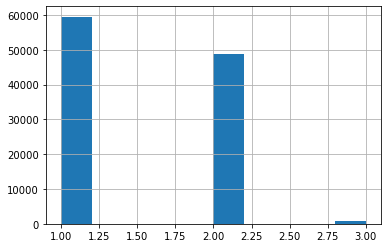

In [60]:
occupants['SEX'].hist()

W wypadkach większy udział odnotowano w przypadku mężczyzn (ok 54%), kobiety stanowity ok 46%( w tym ok 0,8% to kobiety w ciąży).

In [47]:
wypadki_per_sex_role=occupants.groupby(["SEX",'ROLE'],dropna=False)['SEX'].apply(lambda occupants: occupants.count() / n_poszkodowanych).to_frame(name = 'count').reset_index()

In [51]:
wypadki_per_sex_role.sort_values(by="count", ascending = False).head()

,SEX,ROLE,count
0,1.0,1.0,0.379046
3,2.0,1.0,0.272721
4,2.0,2.0,0.167452
1,1.0,2.0,0.158178
6,3.0,1.0,0.004633


Większa liczba mężczyzn kierowców (37,91%) niż kobiet kierowców (27,3%). 

Większa liczba kobiet jako pasażer (16,75%) niż mężczyzn (15,82%).

## KOLUMNA **WEIGHT - waga**


In [53]:
print(f" W kolumnie WEIGHT {(occupants.WEIGHT.isna().sum()/n_poszkodowanych):.2%} przypadków to NaN ")
print(f" Przypadków NaN w WEIGHT jest {occupants.WEIGHT.isna().sum()}")

 W kolumnie WEIGHT 34.50% przypadków to NaN 
 Przypadków NaN w WEIGHT jest 38202


In [49]:
wypadki_per_waga = occupants.groupby(["WEIGHT"])['WEIGHT'].count()/occupants.shape[0]
wypadki_per_waga

WEIGHT
1.0    0.023389
2.0    0.018792
3.0    0.123654
4.0    0.252736
5.0    0.170071
6.0    0.066374
Name: WEIGHT, dtype: float64

In [66]:
occupants['WEIGHT'].value_counts()

4.0    27987
5.0    18833
3.0    13693
6.0     7350
1.0     2590
2.0     2081
Name: WEIGHT, dtype: int64

In [74]:
occupants['WEIGHT'].describe()

count    72534.000000
mean         4.109025
std          1.130491
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: WEIGHT, dtype: float64

<AxesSubplot:>

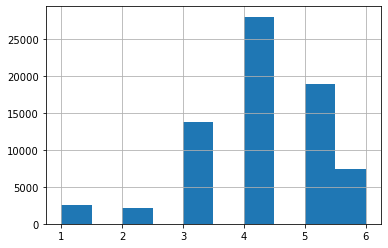

In [61]:
occupants['WEIGHT'].hist()

Największa ilość (25,73%) osób o wadze 61-80 kg, następnie 81-100 kg (17,00%), 41-60 kg (12,37%). 

## KOLUMNA **SEATPOS - pozycja siedzenia pasażera**


In [55]:
print(f" W kolumnie SEATPOS {(occupants.SEATPOS.isna().sum()/n_poszkodowanych):.2%} przypadków to NaN ")
print(f" Przypadków NaN w SEATPOS jest {occupants.SEATPOS.isna().sum()}")

 W kolumnie SEATPOS 10.96% przypadków to NaN 
 Przypadków NaN w SEATPOS jest 12139


In [54]:
wypadki_per_pozycja = occupants.groupby(["SEATPOS"])['SEATPOS'].count()/occupants.shape[0]
wypadki_per_pozycja 

SEATPOS
1.0    0.762065
2.0    0.117875
3.0    0.008173
4.0    0.002267
Name: SEATPOS, dtype: float64

In [67]:
occupants['SEATPOS'].value_counts()

1.0    84388
2.0    13053
3.0      905
4.0      251
Name: SEATPOS, dtype: int64

In [73]:
occupants['SEATPOS'].describe()

count    98597.000000
mean         1.158382
std          0.408572
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: SEATPOS, dtype: float64

<AxesSubplot:>

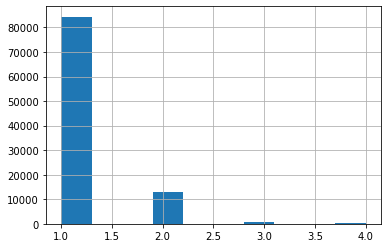

In [62]:
occupants['SEATPOS'].hist()

76,21% to pozycja z przodu obok kierowcy, 11.79% to pozycja w drugim rzędzie. 

## KOLUMNA **BODYTYPE - typ auta**

In [57]:
print(f" W kolumnie BODYTYPE {(vehicles.BODYTYPE.isna().sum()/n_poszkodowanych):.2%} przypadków to NaN ")
print(f" Przypadków NaN w BODYTYPE jest {vehicles.BODYTYPE.isna().sum()}")

 W kolumnie BODYTYPE 0.17% przypadków to NaN 
 Przypadków NaN w BODYTYPE jest 193


In [ ]:
wypadki_per_tauta = vehicles.groupby(["BODYTYPE"])['BODYTYPE'].count()/occupants.shape[0]
wypadki_per_tauta 

In [68]:
vehicles['BODYTYPE'].value_counts()

0.0    55002
5.0    35604
4.0     1616
1.0     1332
2.0      584
3.0      157
6.0       55
Name: BODYTYPE, dtype: int64

In [72]:
vehicles['BODYTYPE'].describe()

count    94350.000000
mean         1.990302
std          2.412812
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max          6.000000
Name: BODYTYPE, dtype: float64

<AxesSubplot:>

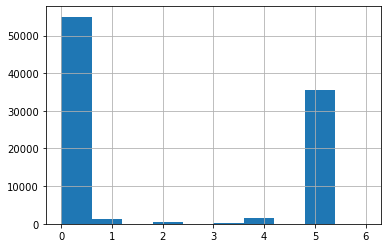

In [63]:
vehicles['BODYTYPE'].hist()

49,67% to auta osobowe biorące udział w wypadku, zaś 32,15% to większe samochody tj. suvy czy vany.

## KOLUMNA **MAKE - marka auta**

In [58]:
print(f" W kolumnie MAKE {(vehicles.MAKE.isna().sum()/n_poszkodowanych):.2%} przypadków to NaN ")
print(f" Przypadków NaN w MAKE jest {vehicles.MAKE.isna().sum()}")

 W kolumnie MAKE 0.61% przypadków to NaN 
 Przypadków NaN w MAKE jest 676


In [ ]:
wypadki_per_marka_auta = vehicles.groupby(["MAKE"])['MAKE'].count()/occupants.shape[0]
wypadki_per_marka_auta 

In [ ]:
wypadki_per_marka_auta.sort_values(ascending=False)

In [ ]:
((wypadki_per_marka_auta.sort_values(ascending=False))[:10])

In [70]:
vehicles['MAKE'].value_counts().head(20)

12.0    15145
20.0    13738
49.0     8906
37.0     7107
7.0      5770
35.0     5205
22.0     3075
2.0      2767
23.0     2336
18.0     2182
6.0      2161
55.0     1914
14.0     1615
41.0     1601
30.0     1466
21.0     1356
52.0     1315
24.0     1296
63.0     1288
19.0     1143
Name: MAKE, dtype: int64

In [71]:
vehicles['MAKE'].describe()

count    93867.000000
mean        28.393333
std         18.758576
min          1.000000
25%         12.000000
50%         21.000000
75%         41.000000
max         98.000000
Name: MAKE, dtype: float64

<AxesSubplot:>

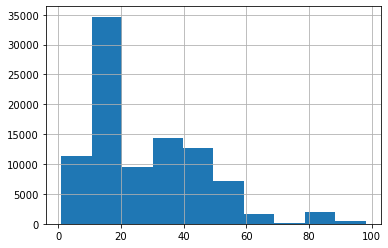

In [64]:
vehicles['MAKE'].hist()

Najwięcej wypadków miały marki : Ford 13,68%, Chevrolet 12,41%, Toyota 8,04%, Honda 6,42%, Dodge 5,21%.

